<a href="https://colab.research.google.com/github/mcsdonats/covidca/blob/main/Markowitz_ativos_mcardoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install yfinance
import yfinance as yf

In [408]:
acoes = ['BTC-USD', 'ETH-USD', 'AVAX-USD']

carteira = pd.DataFrame()
for i in acoes:
  carteira[i] = yf.download(i, period='1y')['Adj Close']

carteira


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BTC-USD,ETH-USD,AVAX-USD
Date,,,
2021-02-11,47909.332031,1783.797974,47.370319
2021-02-12,47504.851562,1843.532593,48.656181
2021-02-13,47105.515625,1814.109863,43.787148
2021-02-14,48717.289062,1805.084106,38.575954
2021-02-15,47945.058594,1779.791016,38.176502
...,...,...,...
2022-02-07,43840.285156,3142.470703,83.167000
2022-02-08,44118.445312,3122.608643,86.624199
2022-02-09,44338.796875,3239.457031,90.020866


In [409]:
pip install cryptocompare

In [410]:
import cryptocompare as cr

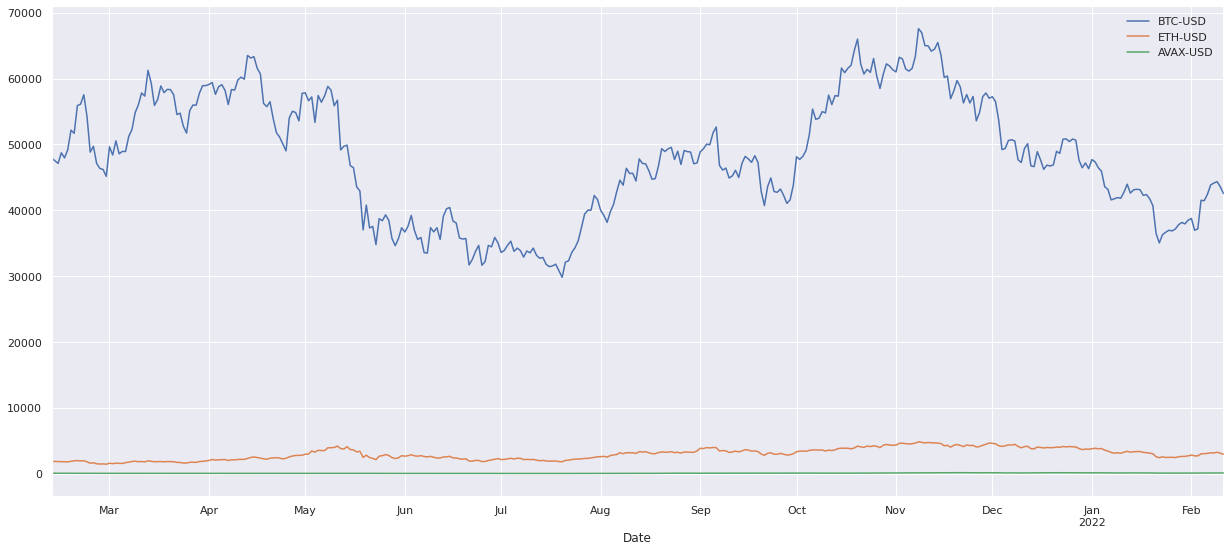

In [411]:
sns.set()
carteira.plot(figsize=(21,9))

In [412]:
retorno =  carteira.pct_change()
retorno


,BTC-USD,ETH-USD,AVAX-USD
Date,,,
2021-02-11,NaN,NaN,NaN
2021-02-12,-0.008443,0.033487,0.027145
2021-02-13,-0.008406,-0.015960,-0.100070
2021-02-14,0.034216,-0.004975,-0.119012
2021-02-15,-0.015851,-0.014012,-0.010355
...,...,...,...
2022-02-07,0.033666,0.027799,0.055991
2022-02-08,0.006345,-0.006321,0.041569
2022-02-09,0.004995,0.037420,0.039212


In [413]:
retorno_anual = retorno.mean() * 365 #pode mudar se for cripto
retorno_anual

BTC-USD     0.154572
ETH-USD     0.988447
AVAX-USD    1.775291
dtype: float64

In [414]:
cov = retorno.cov() * 365
cov

,BTC-USD,ETH-USD,AVAX-USD
BTC-USD,0.546513,0.584728,0.687334
ETH-USD,0.584728,0.977350,0.960818
AVAX-USD,0.687334,0.960818,2.449736


In [415]:
corr = retorno.corr() 
corr

,BTC-USD,ETH-USD,AVAX-USD
BTC-USD,1.000000,0.800072,0.59403
ETH-USD,0.800072,1.000000,0.62095
AVAX-USD,0.594030,0.620950,1.00000


In [416]:
num_acoes = len(acoes)
num_carteiras = 50000

In [417]:
peso = np.random.random(num_acoes)
peso /= np.sum(peso)
peso

array([0.30595863, 0.02002106, 0.67402031])

In [418]:
# A = [ K L M]
# K = K / K + L + M
# L = L / K + L + M
# M = M / K + L + M 

# K + L + M = K + L + M / K + L + M = 1.0


In [419]:
peso[1] + peso [0] + peso [2]

1.0

In [420]:
retorno_esperado = np.dot(peso, retorno_anual)
retorno_esperado

1.2636644301541144

In [421]:
volatilidade= np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
volatilidade

1.216987013465213

In [422]:
sharpe_ratio = retorno_esperado/volatilidade
sharpe_ratio

1.0383549012211672

In [423]:
retorno_esperado = np.array([retorno_esperado])
volatilidade = np.array([volatilidade])
sharpe_ratio = np.array ([sharpe_ratio])
dic_carteira = {'retorno': retorno_esperado, 'Volatilidade': volatilidade, 'Sharpe Ratio' : sharpe_ratio}

In [424]:
portfolio = pd.DataFrame(dic_carteira)

In [425]:
portfolio

,retorno,Volatilidade,Sharpe Ratio
0,1.263664,1.216987,1.038355


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


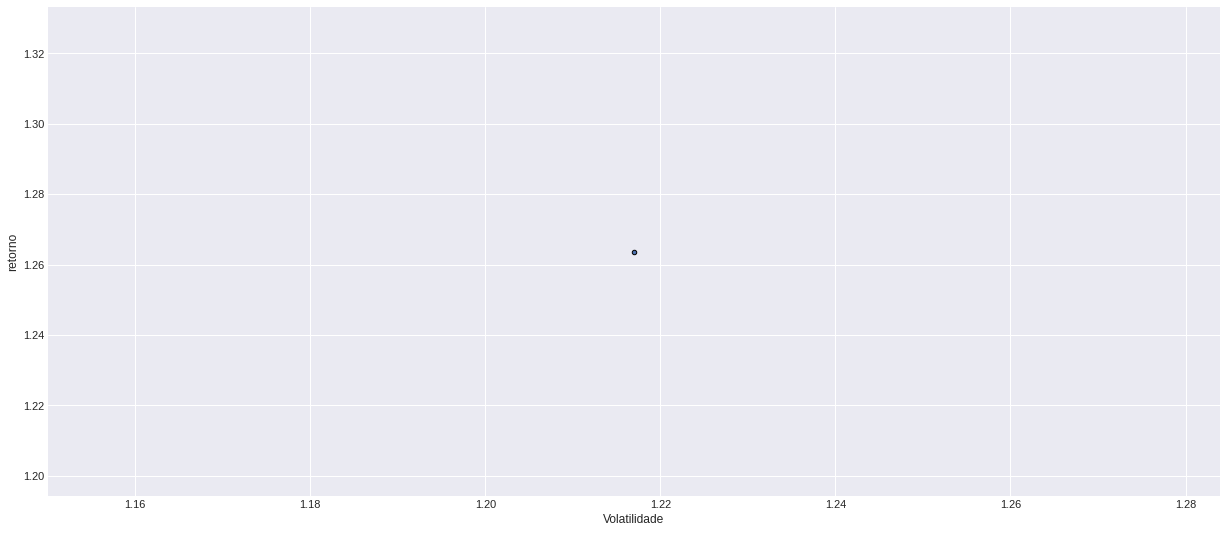

In [426]:
plt.style.use('seaborn-dark')
portfolio.plot.scatter(x='Volatilidade', y='retorno', cmap='RdYlGn', edgecolors='black', figsize=(21,9), grid=True)

In [427]:
lista_retornos = []
lista_volatilidade = []
lista_pesos = []
lista_sharpe_ratio = []


In [428]:
for carteira in range(num_carteiras):
    peso = np.random.random(num_acoes)
    peso /= np.sum(peso)
    lista_pesos.append(peso)
    retorno_esperado = np.dot(peso, retorno_anual)
    lista_retornos.append(retorno_esperado)
    volatilidade= np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
    lista_volatilidade.append(volatilidade)
    sharpe_ratio = retorno_esperado/volatilidade
    lista_sharpe_ratio.append(sharpe_ratio)


In [429]:
dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade, 'Sharpe Ratio' : lista_sharpe_ratio}
for contar,acao in enumerate(acoes):
  dic_carteiras[acao +' Peso'] = [Peso[contar] for Peso in lista_pesos]

portfolios = pd.DataFrame(dic_carteiras)

colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao + ' Peso' for acao in acoes]

portfolios = portfolios[colunas]


In [430]:
portfolios

,Retorno,Volatilidade,Sharpe Ratio,BTC-USD Peso,ETH-USD Peso,AVAX-USD Peso
0,1.005464,0.974962,1.031284,0.283618,0.394186,0.322197
1,0.817916,0.889857,0.919155,0.373745,0.446898,0.179357
2,0.543341,0.809754,0.670995,0.654958,0.216622,0.128420
3,0.691281,0.887591,0.778828,0.635013,0.069687,0.295300
4,0.638778,0.833597,0.766291,0.548731,0.314133,0.137135
...,...,...,...,...,...,...
49995,0.704105,0.878759,0.801249,0.592402,0.141158,0.266440
49996,1.333881,1.232791,1.082001,0.222847,0.101973,0.675180
49997,1.148899,1.039292,1.105463,0.171639,0.442544,0.385817
49998,0.985861,0.982048,1.003883,0.345454,0.291730,0.362816


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


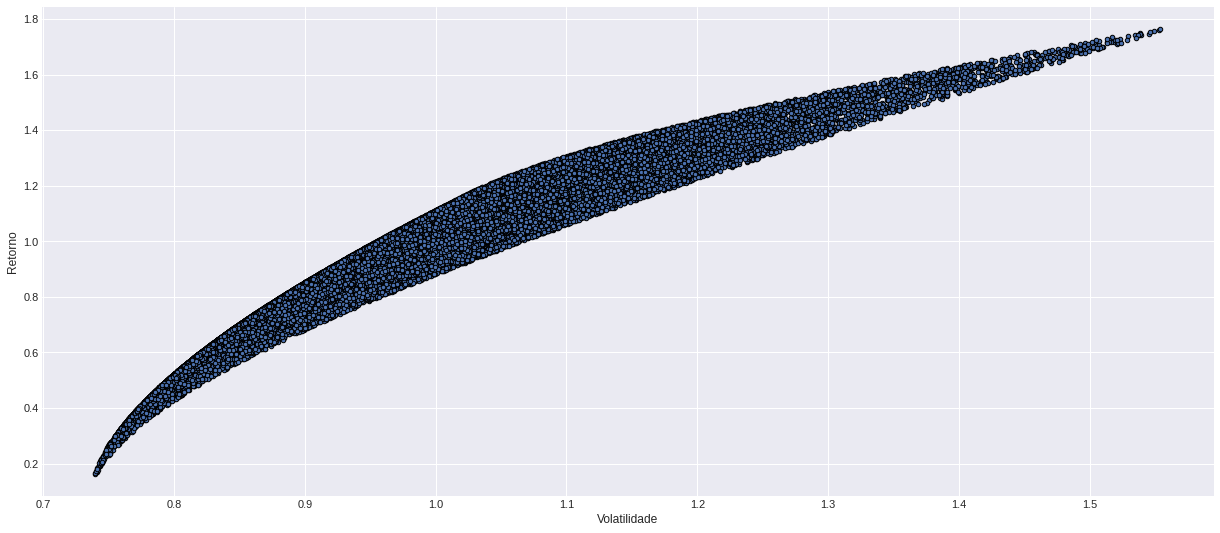

In [431]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade', y='Retorno', cmap='RdYlGn', edgecolors='black', figsize=(21,9), grid=True)

In [432]:
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_min_variancia = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_min_variancia

,Retorno,Volatilidade,Sharpe Ratio,BTC-USD Peso,ETH-USD Peso,AVAX-USD Peso
16282,0.16215,0.739901,0.219152,0.992503,0.005812,0.001686


In [433]:
maior_sharpe = portfolios['Sharpe Ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
carteira_maior_sharpe

,Retorno,Volatilidade,Sharpe Ratio,BTC-USD Peso,ETH-USD Peso,AVAX-USD Peso
14185,1.396845,1.168677,1.195237,0.000056,0.480851,0.519093


In [434]:
carteira_min_variancia.T

,16282
Retorno,0.162150
Volatilidade,0.739901
Sharpe Ratio,0.219152
BTC-USD Peso,0.992503
ETH-USD Peso,0.005812
AVAX-USD Peso,0.001686


In [435]:
carteira_maior_sharpe.T

,14185
Retorno,1.396845
Volatilidade,1.168677
Sharpe Ratio,1.195237
BTC-USD Peso,0.000056
ETH-USD Peso,0.480851
AVAX-USD Peso,0.519093
